# Estimación y Predicción de Presión Arterial en pacientes

En esta notebook, mostraremos el proceso del desarrollo de modelos predictivos en pacientes en clínicas/hospitales de Neuquén, Argentina. Haremos enfoque en la presión arterial sistólica y diastólica de cada paciente (TAS y TAD), estimando posibles consecuencias, según los resultados de cada consulta médica realizada.

Alumnos:
- Ortega Cor, Maria Eva
- Rodriguez, Javier Ceferino

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date
import matplotlib.pyplot as plt 
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df_adultos = pd.read_csv('./pacientes_adultos_cleaned.csv', index_col="idPACIENTE")
df_adultos

,SEXO,FECHA DE NACIMIENTO,DIABETES,HIPERTENSION,OBESIDAD,ENF. CARDIOVASCULAR ESTABLECIDA,CARDIOPATIA ISQUEMICA,ENF. CEREBROVASCULAR,ENF. ARTERIAL PERIFERICA,TAS,...,DIFERENCIA_IMC,CREATININEMIA,RAC,DANNO_RENAL,ENFERMEDAD RENAL CRONICA,COLESTEROL_TOTAL,COLESTEROL_TOTAL.1,FECHA NUTRICION,TENSION ARTERIAL TIPO,EDAD
idPACIENTE,,,,,,,,,,,,,,,,,,,,,
1BEAL18264,MASCULINO,01/01/1950,NO,SI,NO,NO,NaN,NaN,NaN,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prehipertensión,72
2LUMA17005,FEMENINO,22/07/1946,DM2,SI,NO,NO,NaN,NaN,NaN,110.0,...,NaN,2.52,NaN,DR4,NaN,125.0,73.0,NaN,Normal,76
2VIJU16242,FEMENINO,19/06/1944,DM2,NO,NO,NO,NaN,NaN,NaN,140.0,...,NaN,0.94,NaN,DR2,NaN,158.0,NaN,NaN,Hipertensión Estadio 1,78
2SACE16091,FEMENINO,20/01/1944,NO,SI,NO,NO,NaN,NaN,NaN,200.0,...,NaN,1.30,19.0,DR3,ERC SIN DATO DE ESTADIO,182.0,119.0,16/04/2021,Hipertensión Estadio 1,78
2SAMA16192,FEMENINO,30/04/1944,NO,SI,NO,NO,NaN,NaN,NaN,110.0,...,NaN,NaN,0.0,NaN,NaN,221.0,129.0,NaN,Normal,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2ROVI26360,FEMENINO,02/03/1972,NO,SI,NO,NO,NaN,NaN,NaN,160.0,...,NaN,0.80,NaN,DR2,NaN,186.0,115.5,NaN,Hipertensión Estadio 2,50
2TOIR17545,FEMENINO,13/01/1948,NO,SI,NO,NO,NaN,NaN,NaN,124.0,...,NaN,1.02,NaN,DR3,NaN,NaN,NaN,NaN,Prehipertensión,74
2MECE20267,FEMENINO,27/06/1955,NO,SI,NO,NO,NaN,NaN,NaN,120.0,...,NaN,1.01,NaN,DR3,NaN,NaN,NaN,NaN,Prehipertensión,67


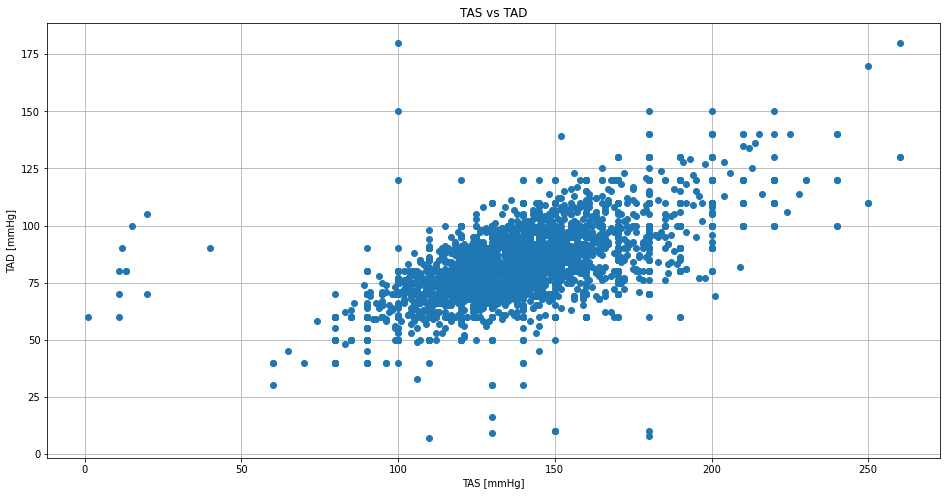

In [3]:
df_adultos.plot(x='TAS', y='TAD', style='o', figsize=(16, 8), legend=None) 
plt.title("TAS vs TAD")
plt.xlabel("TAS [mmHg]")
plt.ylabel("TAD [mmHg]")

plt.grid()
plt.show()

Se grafican los valores que alcanza la *TAS*

<Figure size 1080x720 with 0 Axes>

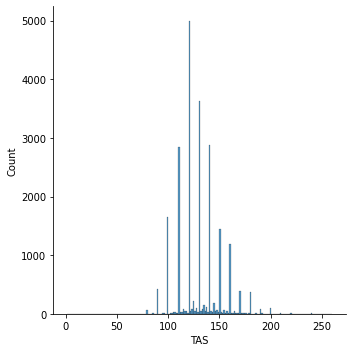

In [4]:
plt.figure(figsize=(15,10))
sns.displot(df_adultos['TAS'])
plt.tight_layout()

In [5]:
X = df_adultos['TAS'].values.reshape(-1,1)
y = df_adultos['TAD'].values.reshape(-1,1)
df_mod = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
df_mod

,X,y
0,130.0,70.0
1,110.0,70.0
2,140.0,90.0
3,200.0,96.0
4,110.0,70.0
...,...,...
22378,160.0,100.0
22379,124.0,79.0
22380,120.0,80.0
22381,140.0,70.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
df_mod = pd.DataFrame({'X_train': X_train.flatten(), 'y_train': y_train.flatten()})
df_mod.head()

,X_train,y_train
0,120.0,60.0
1,140.0,80.0
2,110.0,60.0
3,110.0,60.0
4,143.0,83.0


In [7]:
df_aux = pd.DataFrame({'X_test': X_test.flatten(), 'y_test': y_test.flatten()})
df_mod.head()

,X_train,y_train
0,120.0,60.0
1,140.0,80.0
2,110.0,60.0
3,110.0,60.0
4,143.0,83.0


In [8]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [9]:
print(regressor.intercept_)

[21.46029392]


In [10]:
print(regressor.coef_)

[[0.45033251]]


 Esto significa que por cada unidad de cambio en la TAS, el cambio en la TAD es de alrededor de 0,45%. 

In [11]:
y_pred = regressor.predict(X_test)

Comparación entre el valor real y el valor de predicción

In [12]:
df_mod = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_mod

,Actual,Predicted
0,60.0,75.500196
1,80.0,70.996870
2,80.0,70.996870
3,100.0,89.010171
4,85.0,84.506846
...,...,...
6710,80.0,80.003521
6711,60.0,75.500196
6712,85.0,75.500196
6713,80.0,75.500196


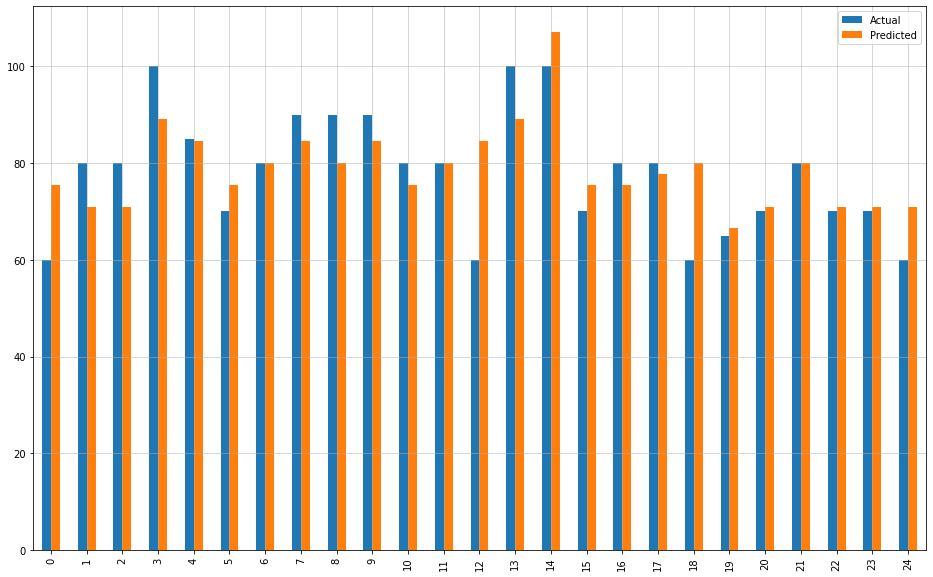

In [13]:
df_rl = df_mod.head(25)
df_rl.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

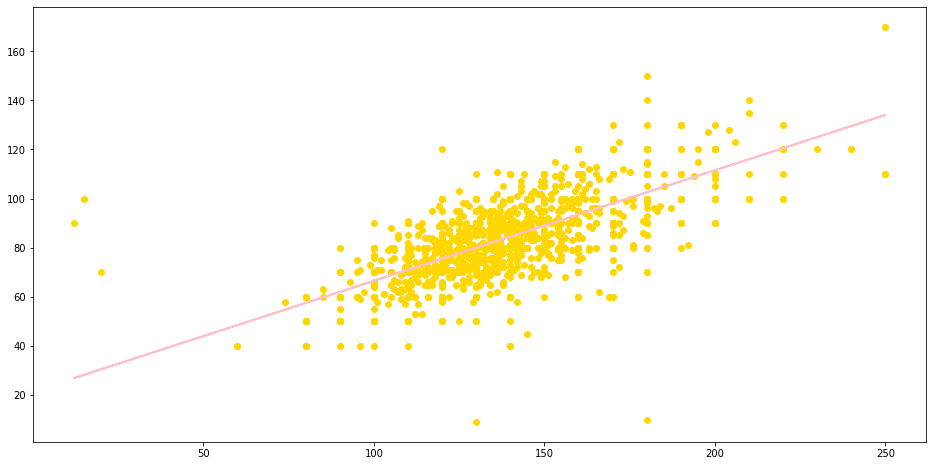

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test,  color='gold')
plt.plot(X_test, y_pred, color='pink', linewidth=2)
plt.show()

Medición de métricas para la evaluación del modelo de Regresión lineal simple

In [15]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 6.72573429765274
Error Cuadratico Medio: 78.57002375593649
Raíz del error cuadrático medio: 8.863973361644115
